### Deliverable 1: Preprocessing the Data for a Neural Network

In [121]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [122]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME","STATUS"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [123]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [124]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [125]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

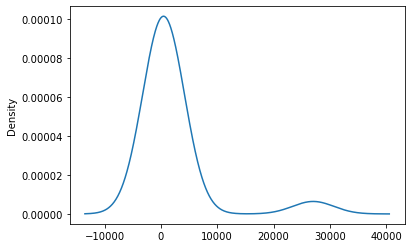

In [126]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [127]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [128]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

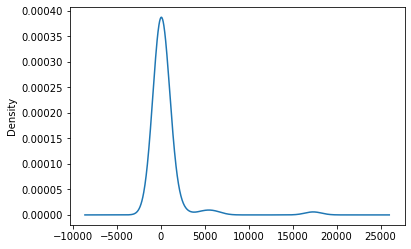

In [129]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [130]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [131]:
# Look at ASK_AMT value counts for binning
amt_counts = application_df.ASK_AMT.value_counts()
amt_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [132]:
# Determine which values to replace if value is above 5000
replace_amt = application_df["ASK_AMT"][application_df["ASK_AMT"] > 5000]

# Replace in dataframe
for amt in replace_amt:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(amt, ">5000")
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000     25398
>5000     8901
Name: ASK_AMT, dtype: int64

In [133]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [134]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_>5000
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [135]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_>5000
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [136]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [137]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [138]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
from tensorflow.keras.callbacks import ModelCheckpoint
import os
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 150
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               8800      
                                                                 
 dense_17 (Dense)            (None, 150)               30150     
                                                                 
 dense_18 (Dense)            (None, 50)                7550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 46,551
Trainable params: 46,551
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compile the model
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [140]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=15,callbacks=[cp_callback])

Epoch 1/15
  1/804 [..............................] - ETA: 3:32 - loss: 0.7586 - accuracy: 0.4375
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6695 - accuracy: 0.6083  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6492 - accuracy: 0.6425
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6119 - accuracy: 0.6819
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5




Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5664 - accuracy: 0.7234
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5663 - accuracy: 0.7236
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5655 - accuracy: 0.7243
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.

251/804 [========>.....................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7288
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5545 - accuracy: 0.7267
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5543 - accuracy: 0.7275
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.5538 - accuracy: 0.7286
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 2: saving model to checkpoints\weights.02.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7282
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5543 - accuracy: 0.7282
Epoch 3/15
  1/804 [..............................] - ETA: 2s - loss: 0.5906 - accuracy: 0.6250
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5675 - accuracy: 0.7206
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 2s - l


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5547 - accuracy: 0.7278
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5532 - accuracy: 0.7290
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5532 - accuracy: 0.7285
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.

238/804 [=======>......................] - ETA: 1s - loss: 0.5475 - accuracy: 0.7400
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5492 - accuracy: 0.7395
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7389
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7374
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving


Epoch 4: saving model to checkpoints\weights.04.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7317
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7318
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5497 - accuracy: 0.7318
Epoch 5/15
  1/804 [..............................] - ETA: 1s - loss: 0.4269 - accuracy: 0.8125
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7352
Epoch 5: saving model t


Epoch 5: saving model to checkpoints\weights.05.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5503 - accuracy: 0.7320
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5493 - accuracy: 0.7327
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5493 - accuracy: 0.7329
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5489 - accuracy: 0.7328
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving

215/804 [=======>......................] - ETA: 1s - loss: 0.5530 - accuracy: 0.7327
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5508 - accuracy: 0.7344
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.5501 - accuracy: 0.7339
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7351
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving


Epoch 6: saving model to checkpoints\weights.06.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5472 - accuracy: 0.7343
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5481 - accuracy: 0.7335
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5482 - accuracy: 0.7328
Epoch 6: saving model to checkpoints\weights.06.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5475 - accuracy: 0.7335
Epoch 7/15

Epoch 7: saving model to checkpoints\weights.07.hdf5
  1/804 [..............................] - ETA: 7s - l


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7392
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.5434 - accuracy: 0.7373
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.5444 - accuracy: 0.7359
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7351
Epoch 7: saving


Epoch 8: saving model to checkpoints\weights.08.hdf5
202/804 [======>.......................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7372
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7387
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7373
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
262/804 [========>.....................] - ETA

732/804 [==========================>...] - ETA: 0s - loss: 0.5439 - accuracy: 0.7348
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5447 - accuracy: 0.7342
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5446 - accuracy: 0.7338
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5448 - accuracy: 0.7335
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving

443/804 [===============>..............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7351
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7352
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7344
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5441 - accuracy: 0.7336
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7340
Epoch 9: saving model to checkpoints\we

788/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7318
Epoch 9: saving model to checkpoints\weights.09.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7319
Epoch 9: saving model to checkpoints\weights.09.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7319
Epoch 9: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.5452 - accuracy: 0.7320
Epoch 10/15
  1/804 [..............................] - ETA: 13s - loss: 0.5664 - accuracy: 0.6875
Epoch 10: saving model to checkpoints\weights.10.hdf5
  8/804 [..............................] - ETA: 21s - loss: 0.5659 - accuracy: 0.7227
Epoch 10: saving model to checkpoints\weights.10.hdf5
  9/804 [..............................] - ETA: 26s - loss: 0.5716 - accuracy: 0.7083
Epoch 10: saving model to checkpoints\weights.10.hdf5
 14/804 [..............................] - ETA: 24s - loss: 0.558

274/804 [=========>....................] - ETA: 14s - loss: 0.5482 - accuracy: 0.7315
Epoch 10: saving model to checkpoints\weights.10.hdf5
279/804 [=========>....................] - ETA: 14s - loss: 0.5477 - accuracy: 0.7317
Epoch 10: saving model to checkpoints\weights.10.hdf5
288/804 [=========>....................] - ETA: 13s - loss: 0.5480 - accuracy: 0.7307
Epoch 10: saving model to checkpoints\weights.10.hdf5
293/804 [=========>....................] - ETA: 13s - loss: 0.5484 - accuracy: 0.7302
Epoch 10: saving model to checkpoints\weights.10.hdf5
294/804 [=========>....................] - ETA: 13s - loss: 0.5480 - accuracy: 0.7302
Epoch 10: saving model to checkpoints\weights.10.hdf5
299/804 [==========>...................] - ETA: 13s - loss: 0.5489 - accuracy: 0.7290
Epoch 10: saving model to checkpoints\weights.10.hdf5
304/804 [==========>...................] - ETA: 13s - loss: 0.5486 - accuracy: 0.7290
Epoch 10: saving model to checkpoints\weights.10.hdf5
309/804 [==========>

569/804 [====================>.........] - ETA: 6s - loss: 0.5483 - accuracy: 0.7296
Epoch 10: saving model to checkpoints\weights.10.hdf5
574/804 [====================>.........] - ETA: 6s - loss: 0.5480 - accuracy: 0.7297
Epoch 10: saving model to checkpoints\weights.10.hdf5
579/804 [====================>.........] - ETA: 5s - loss: 0.5479 - accuracy: 0.7297
Epoch 10: saving model to checkpoints\weights.10.hdf5
584/804 [====================>.........] - ETA: 5s - loss: 0.5476 - accuracy: 0.7298
Epoch 10: saving model to checkpoints\weights.10.hdf5
589/804 [====================>.........] - ETA: 5s - loss: 0.5475 - accuracy: 0.7299
Epoch 10: saving model to checkpoints\weights.10.hdf5
594/804 [=====================>........] - ETA: 5s - loss: 0.5469 - accuracy: 0.7303
Epoch 10: saving model to checkpoints\weights.10.hdf5
599/804 [=====================>........] - ETA: 5s - loss: 0.5467 - accuracy: 0.7305
Epoch 10: saving model to checkpoints\weights.10.hdf5
608/804 [==================

 55/804 [=>............................] - ETA: 18s - loss: 0.5349 - accuracy: 0.7381
Epoch 11: saving model to checkpoints\weights.11.hdf5
 64/804 [=>............................] - ETA: 18s - loss: 0.5327 - accuracy: 0.7368
Epoch 11: saving model to checkpoints\weights.11.hdf5
 69/804 [=>............................] - ETA: 18s - loss: 0.5304 - accuracy: 0.7400
Epoch 11: saving model to checkpoints\weights.11.hdf5
 70/804 [=>............................] - ETA: 18s - loss: 0.5284 - accuracy: 0.7415
Epoch 11: saving model to checkpoints\weights.11.hdf5
 75/804 [=>............................] - ETA: 18s - loss: 0.5322 - accuracy: 0.7404
Epoch 11: saving model to checkpoints\weights.11.hdf5
 80/804 [=>............................] - ETA: 18s - loss: 0.5345 - accuracy: 0.7387
Epoch 11: saving model to checkpoints\weights.11.hdf5
 85/804 [==>...........................] - ETA: 18s - loss: 0.5355 - accuracy: 0.7375
Epoch 11: saving model to checkpoints\weights.11.hdf5
 94/804 [==>........

349/804 [============>.................] - ETA: 12s - loss: 0.5435 - accuracy: 0.7322
Epoch 11: saving model to checkpoints\weights.11.hdf5
350/804 [============>.................] - ETA: 12s - loss: 0.5436 - accuracy: 0.7321
Epoch 11: saving model to checkpoints\weights.11.hdf5
359/804 [============>.................] - ETA: 12s - loss: 0.5448 - accuracy: 0.7308
Epoch 11: saving model to checkpoints\weights.11.hdf5
363/804 [============>.................] - ETA: 12s - loss: 0.5442 - accuracy: 0.7312
Epoch 11: saving model to checkpoints\weights.11.hdf5
369/804 [============>.................] - ETA: 12s - loss: 0.5434 - accuracy: 0.7323
Epoch 11: saving model to checkpoints\weights.11.hdf5
374/804 [============>.................] - ETA: 11s - loss: 0.5433 - accuracy: 0.7328
Epoch 11: saving model to checkpoints\weights.11.hdf5
379/804 [=============>................] - ETA: 11s - loss: 0.5435 - accuracy: 0.7326
Epoch 11: saving model to checkpoints\weights.11.hdf5
380/804 [===========

640/804 [======================>.......] - ETA: 4s - loss: 0.5432 - accuracy: 0.7342
Epoch 11: saving model to checkpoints\weights.11.hdf5
645/804 [=======================>......] - ETA: 4s - loss: 0.5429 - accuracy: 0.7345
Epoch 11: saving model to checkpoints\weights.11.hdf5
650/804 [=======================>......] - ETA: 4s - loss: 0.5433 - accuracy: 0.7342
Epoch 11: saving model to checkpoints\weights.11.hdf5
659/804 [=======================>......] - ETA: 3s - loss: 0.5436 - accuracy: 0.7342
Epoch 11: saving model to checkpoints\weights.11.hdf5
660/804 [=======================>......] - ETA: 3s - loss: 0.5437 - accuracy: 0.7342
Epoch 11: saving model to checkpoints\weights.11.hdf5
665/804 [=======================>......] - ETA: 3s - loss: 0.5435 - accuracy: 0.7342
Epoch 11: saving model to checkpoints\weights.11.hdf5
670/804 [========================>.....] - ETA: 3s - loss: 0.5433 - accuracy: 0.7343
Epoch 11: saving model to checkpoints\weights.11.hdf5
679/804 [==================

131/804 [===>..........................] - ETA: 19s - loss: 0.5432 - accuracy: 0.7328
Epoch 12: saving model to checkpoints\weights.12.hdf5
140/804 [====>.........................] - ETA: 18s - loss: 0.5477 - accuracy: 0.7301
Epoch 12: saving model to checkpoints\weights.12.hdf5
145/804 [====>.........................] - ETA: 18s - loss: 0.5480 - accuracy: 0.7287
Epoch 12: saving model to checkpoints\weights.12.hdf5
149/804 [====>.........................] - ETA: 18s - loss: 0.5491 - accuracy: 0.7278
Epoch 12: saving model to checkpoints\weights.12.hdf5
155/804 [====>.........................] - ETA: 18s - loss: 0.5484 - accuracy: 0.7282
Epoch 12: saving model to checkpoints\weights.12.hdf5
159/804 [====>.........................] - ETA: 18s - loss: 0.5490 - accuracy: 0.7276
Epoch 12: saving model to checkpoints\weights.12.hdf5
165/804 [=====>........................] - ETA: 18s - loss: 0.5490 - accuracy: 0.7273
Epoch 12: saving model to checkpoints\weights.12.hdf5
170/804 [=====>.....

421/804 [==============>...............] - ETA: 10s - loss: 0.5494 - accuracy: 0.7294
Epoch 12: saving model to checkpoints\weights.12.hdf5
430/804 [===============>..............] - ETA: 10s - loss: 0.5495 - accuracy: 0.7297
Epoch 12: saving model to checkpoints\weights.12.hdf5
435/804 [===============>..............] - ETA: 10s - loss: 0.5493 - accuracy: 0.7298
Epoch 12: saving model to checkpoints\weights.12.hdf5
436/804 [===============>..............] - ETA: 10s - loss: 0.5495 - accuracy: 0.7297
Epoch 12: saving model to checkpoints\weights.12.hdf5
445/804 [===============>..............] - ETA: 10s - loss: 0.5496 - accuracy: 0.7295
Epoch 12: saving model to checkpoints\weights.12.hdf5
446/804 [===============>..............] - ETA: 10s - loss: 0.5496 - accuracy: 0.7295
Epoch 12: saving model to checkpoints\weights.12.hdf5
451/804 [===============>..............] - ETA: 10s - loss: 0.5499 - accuracy: 0.7293
Epoch 12: saving model to checkpoints\weights.12.hdf5
456/804 [===========

716/804 [=========================>....] - ETA: 2s - loss: 0.5454 - accuracy: 0.7339
Epoch 12: saving model to checkpoints\weights.12.hdf5
725/804 [==========================>...] - ETA: 2s - loss: 0.5454 - accuracy: 0.7335
Epoch 12: saving model to checkpoints\weights.12.hdf5
726/804 [==========================>...] - ETA: 2s - loss: 0.5455 - accuracy: 0.7336
Epoch 12: saving model to checkpoints\weights.12.hdf5
731/804 [==========================>...] - ETA: 2s - loss: 0.5457 - accuracy: 0.7332
Epoch 12: saving model to checkpoints\weights.12.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.5454 - accuracy: 0.7333
Epoch 12: saving model to checkpoints\weights.12.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 0.5453 - accuracy: 0.7333
Epoch 12: saving model to checkpoints\weights.12.hdf5
750/804 [==========================>...] - ETA: 1s - loss: 0.5450 - accuracy: 0.7335
Epoch 12: saving model to checkpoints\weights.12.hdf5
751/804 [==================

206/804 [======>.......................] - ETA: 15s - loss: 0.5458 - accuracy: 0.7335
Epoch 13: saving model to checkpoints\weights.13.hdf5
211/804 [======>.......................] - ETA: 15s - loss: 0.5458 - accuracy: 0.7333
Epoch 13: saving model to checkpoints\weights.13.hdf5
216/804 [=======>......................] - ETA: 15s - loss: 0.5450 - accuracy: 0.7339
Epoch 13: saving model to checkpoints\weights.13.hdf5
217/804 [=======>......................] - ETA: 15s - loss: 0.5452 - accuracy: 0.7339
Epoch 13: saving model to checkpoints\weights.13.hdf5
222/804 [=======>......................] - ETA: 15s - loss: 0.5437 - accuracy: 0.7351
Epoch 13: saving model to checkpoints\weights.13.hdf5
227/804 [=======>......................] - ETA: 15s - loss: 0.5430 - accuracy: 0.7354
Epoch 13: saving model to checkpoints\weights.13.hdf5
232/804 [=======>......................] - ETA: 15s - loss: 0.5441 - accuracy: 0.7349
Epoch 13: saving model to checkpoints\weights.13.hdf5
237/804 [=======>...

497/804 [=================>............] - ETA: 7s - loss: 0.5466 - accuracy: 0.7328
Epoch 13: saving model to checkpoints\weights.13.hdf5
502/804 [=================>............] - ETA: 7s - loss: 0.5460 - accuracy: 0.7333
Epoch 13: saving model to checkpoints\weights.13.hdf5
507/804 [=================>............] - ETA: 7s - loss: 0.5454 - accuracy: 0.7339
Epoch 13: saving model to checkpoints\weights.13.hdf5
512/804 [==================>...........] - ETA: 7s - loss: 0.5455 - accuracy: 0.7339
Epoch 13: saving model to checkpoints\weights.13.hdf5
517/804 [==================>...........] - ETA: 7s - loss: 0.5447 - accuracy: 0.7345
Epoch 13: saving model to checkpoints\weights.13.hdf5
522/804 [==================>...........] - ETA: 7s - loss: 0.5449 - accuracy: 0.7344
Epoch 13: saving model to checkpoints\weights.13.hdf5
527/804 [==================>...........] - ETA: 7s - loss: 0.5453 - accuracy: 0.7342
Epoch 13: saving model to checkpoints\weights.13.hdf5
536/804 [==================

796/804 [============================>.] - ETA: 0s - loss: 0.5424 - accuracy: 0.7357
Epoch 13: saving model to checkpoints\weights.13.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5424 - accuracy: 0.7358
Epoch 13: saving model to checkpoints\weights.13.hdf5
804/804 [==============================] - 21s 26ms/step - loss: 0.5426 - accuracy: 0.7353
Epoch 14/15
  1/804 [..............................] - ETA: 15s - loss: 0.5534 - accuracy: 0.7500
Epoch 14: saving model to checkpoints\weights.14.hdf5
  3/804 [..............................] - ETA: 42s - loss: 0.5418 - accuracy: 0.7604
Epoch 14: saving model to checkpoints\weights.14.hdf5
  8/804 [..............................] - ETA: 25s - loss: 0.5971 - accuracy: 0.7070
Epoch 14: saving model to checkpoints\weights.14.hdf5
 13/804 [..............................] - ETA: 22s - loss: 0.5781 - accuracy: 0.7067
Epoch 14: saving model to checkpoints\weights.14.hdf5
 18/804 [..............................] - ETA: 20s - loss:

278/804 [=========>....................] - ETA: 13s - loss: 0.5449 - accuracy: 0.7344
Epoch 14: saving model to checkpoints\weights.14.hdf5
283/804 [=========>....................] - ETA: 13s - loss: 0.5452 - accuracy: 0.7339
Epoch 14: saving model to checkpoints\weights.14.hdf5
288/804 [=========>....................] - ETA: 13s - loss: 0.5446 - accuracy: 0.7342
Epoch 14: saving model to checkpoints\weights.14.hdf5
293/804 [=========>....................] - ETA: 12s - loss: 0.5446 - accuracy: 0.7346
Epoch 14: saving model to checkpoints\weights.14.hdf5
301/804 [==========>...................] - ETA: 12s - loss: 0.5433 - accuracy: 0.7357
Epoch 14: saving model to checkpoints\weights.14.hdf5
307/804 [==========>...................] - ETA: 12s - loss: 0.5430 - accuracy: 0.7356
Epoch 14: saving model to checkpoints\weights.14.hdf5
308/804 [==========>...................] - ETA: 12s - loss: 0.5429 - accuracy: 0.7356
Epoch 14: saving model to checkpoints\weights.14.hdf5
313/804 [==========>

573/804 [====================>.........] - ETA: 5s - loss: 0.5434 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5
578/804 [====================>.........] - ETA: 5s - loss: 0.5439 - accuracy: 0.7349
Epoch 14: saving model to checkpoints\weights.14.hdf5
587/804 [====================>.........] - ETA: 5s - loss: 0.5434 - accuracy: 0.7352
Epoch 14: saving model to checkpoints\weights.14.hdf5
588/804 [====================>.........] - ETA: 5s - loss: 0.5435 - accuracy: 0.7351
Epoch 14: saving model to checkpoints\weights.14.hdf5
593/804 [=====================>........] - ETA: 5s - loss: 0.5437 - accuracy: 0.7349
Epoch 14: saving model to checkpoints\weights.14.hdf5
602/804 [=====================>........] - ETA: 5s - loss: 0.5444 - accuracy: 0.7343
Epoch 14: saving model to checkpoints\weights.14.hdf5
603/804 [=====================>........] - ETA: 5s - loss: 0.5446 - accuracy: 0.7341
Epoch 14: saving model to checkpoints\weights.14.hdf5
608/804 [==================

 62/804 [=>............................] - ETA: 24s - loss: 0.5386 - accuracy: 0.7283
Epoch 15: saving model to checkpoints\weights.15.hdf5
 67/804 [=>............................] - ETA: 24s - loss: 0.5410 - accuracy: 0.7276
Epoch 15: saving model to checkpoints\weights.15.hdf5
 72/804 [=>............................] - ETA: 25s - loss: 0.5486 - accuracy: 0.7205
Epoch 15: saving model to checkpoints\weights.15.hdf5
 77/804 [=>............................] - ETA: 25s - loss: 0.5526 - accuracy: 0.7188
Epoch 15: saving model to checkpoints\weights.15.hdf5
 83/804 [==>...........................] - ETA: 24s - loss: 0.5516 - accuracy: 0.7203
Epoch 15: saving model to checkpoints\weights.15.hdf5
 88/804 [==>...........................] - ETA: 24s - loss: 0.5515 - accuracy: 0.7202
Epoch 15: saving model to checkpoints\weights.15.hdf5
 92/804 [==>...........................] - ETA: 24s - loss: 0.5496 - accuracy: 0.7238
Epoch 15: saving model to checkpoints\weights.15.hdf5
 94/804 [==>........

349/804 [============>.................] - ETA: 13s - loss: 0.5409 - accuracy: 0.7355
Epoch 15: saving model to checkpoints\weights.15.hdf5
354/804 [============>.................] - ETA: 12s - loss: 0.5409 - accuracy: 0.7353
Epoch 15: saving model to checkpoints\weights.15.hdf5
359/804 [============>.................] - ETA: 12s - loss: 0.5404 - accuracy: 0.7357
Epoch 15: saving model to checkpoints\weights.15.hdf5
364/804 [============>.................] - ETA: 12s - loss: 0.5402 - accuracy: 0.7360
Epoch 15: saving model to checkpoints\weights.15.hdf5
369/804 [============>.................] - ETA: 12s - loss: 0.5407 - accuracy: 0.7355
Epoch 15: saving model to checkpoints\weights.15.hdf5
374/804 [============>.................] - ETA: 12s - loss: 0.5401 - accuracy: 0.7360
Epoch 15: saving model to checkpoints\weights.15.hdf5
379/804 [=============>................] - ETA: 11s - loss: 0.5411 - accuracy: 0.7357
Epoch 15: saving model to checkpoints\weights.15.hdf5
384/804 [===========

714/804 [=========================>....] - ETA: 1s - loss: 0.5417 - accuracy: 0.7363
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.5415 - accuracy: 0.7362
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
754/804 [===========================>..] - ETA: 1s - loss: 0.5412 - accuracy: 0.7363
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5419 - accuracy: 0.7363
Epo

In [141]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5529 - accuracy: 0.7278 - 267ms/epoch - 997us/step
Loss: 0.5529348850250244, Accuracy: 0.7278134226799011


<AxesSubplot:>

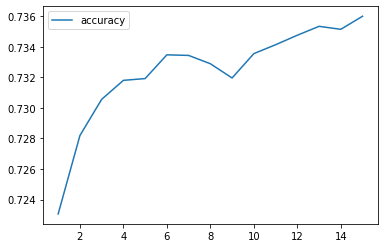

In [142]:
# Plot the accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="accuracy")

In [143]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")